# スクレイピングしたデータセットの分析・評価

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## 1. データを整形する

In [2]:
city_name = ["23ku", "nagoya", "osaka", "saitama", "yokohama"]

column_name = {'企業名': 'corp', '最寄り駅': 'station', '職種': 'occupation', '給与形態': 'pay_form', 
               '給与金額': 'pay_qty', '勤務開始時間': 'start_time', '勤務終了時間': 'end_time', 
               '日払い': 'daily_paid', '週払い': 'weekly_paid', '高収入': 'high_income', '学生': 'student', 
               '高校生': 'high_school', 'ミドル': 'middle_age', '主婦(夫)': 'housewife', '未経験OK': 'inexperienced', 
               '交通費有': 'transport', '年齢(10代)': 'age_10', '年齢(20代)': 'age_20', '年齢(30代)': 'age_30', 
               '年齢(40代)': 'age_40', '年齢(50代)': 'age_50', '男女割合': 'sex_ratio', '仕事の仕方': 'manner', '職場の様子': 'atoms'}

In [3]:
tokyo = pd.read_csv("./result_file_0/23ku.csv")
nagoya = pd.read_csv("./result_file_0/nagoya.csv")
osaka = pd.read_csv("./result_file_0/osaka.csv")
saitama = pd.read_csv("./result_file_0/saitama.csv")
yokohama = pd.read_csv("./result_file_0/yokohama.csv")

In [4]:
# リストにまとめる
df_list = [tokyo, nagoya, osaka, saitama, yokohama]

In [5]:
for i in range(len(df_list)):
    df_list[i].insert(0, "city", city_name[i])

In [6]:
# 1つのデータフレームにまとめる
df = df_list[0]
for i in range(1, len(df_list)):
    df = pd.concat([df, df_list[i]])

In [7]:
# カラム名を全て英語表記に変更する
df = df.rename(columns=column_name)

In [8]:
df.query('corp.str.contains("オーケー　十条店")', engine="python")

,city,corp,station,occupation,pay_form,pay_qty,start_time,end_time,daily_paid,weekly_paid,...,inexperienced,transport,age_10,age_20,age_30,age_40,age_50,sex_ratio,manner,atoms
27,23ku,オーケー 十条店,東十条駅,販売,時給,1013,6.0,22.0,0,0,...,1,1,0.0,1.0,1.0,1.0,0.0,0.75,0.75,0.5
31,23ku,オーケー 十条店,東十条駅,販売,時給,1013,6.0,22.0,0,0,...,1,1,0.0,1.0,1.0,1.0,0.0,0.75,0.75,0.5


全く同じアルバイト募集が存在する

In [9]:
# 職種を含めて全て重複する行を削除する
df = df.drop_duplicates()

In [10]:
df.reset_index(inplace=True, drop=True)

In [11]:
# 日本語では文字化けしてしまうので職業を英語表記にする
for i in range(len(df)):
    occupation_name = df.loc[:, 'occupation'][i]
    if occupation_name == '販売':
        df.loc[:, 'occupation'][i] = 'sales'
    elif occupation_name == 'フード・飲食':
        df.loc[:, 'occupation'][i] = 'food'
    elif occupation_name == 'サービス':
        df.loc[:, 'occupation'][i] = 'service'
    elif occupation_name == 'イベント':
        df.loc[:, 'occupation'][i] = 'event'
    elif occupation_name == '軽作業・物流':
        df.loc[:, 'occupation'][i] = 'lightwork'
    elif occupation_name == '工場・製造':
        df.loc[:, 'occupation'][i] = 'production'
    elif occupation_name == '建築・土木':
        df.loc[:, 'occupation'][i] = 'architecture'
    elif occupation_name == '営業':
        df.loc[:, 'occupation'][i] = 'business'
    elif occupation_name == 'オフィス':
        df.loc[:, 'occupation'][i] = 'office'
    elif occupation_name == 'IT・クリエイティブ/クリエイター':
        df.loc[:, 'occupation'][i] = 'creative'
    elif occupation_name == '教育':
        df.loc[:, 'occupation'][i] = 'education'
    elif occupation_name == '医療・介護・福祉':
        df.loc[:, 'occupation'][i] = 'medicalcare'
    elif occupation_name == '美容・理容・サロン':
        df.loc[:, 'occupation'][i] = 'beauty'
    elif occupation_name == '調査・モニター':
        df.loc[:, 'occupation'][i] = 'investigation'
    elif occupation_name == '専門職、その他':
        df.loc[:, 'occupation'][i] = 'professional'
    elif occupation_name == 'ガールズバー・キャバクラ・スナック':
        df.loc[:, 'occupation'][i] = 'nightwork'
    else:
        raise Exception

/Users/tamuramasayuki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/tamuramasayuki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/tamuramasayuki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__m

In [12]:
df.head()

,city,corp,station,occupation,pay_form,pay_qty,start_time,end_time,daily_paid,weekly_paid,...,inexperienced,transport,age_10,age_20,age_30,age_40,age_50,sex_ratio,manner,atoms
0,23ku,株式会社エフオープランニング本社,渋谷駅,sales,時給,1500,9.0,22.0,1,1,...,1,1,0.0,1.0,1.0,0.0,0.0,0.75,0.75,1.00
1,23ku,株式会社エフオープランニング本社,秋葉原駅,sales,時給,1600,9.0,22.0,1,1,...,0,1,0.0,1.0,1.0,0.0,0.0,0.75,0.75,1.00
2,23ku,株式会社エフオープランニング本社,上野駅,sales,時給,1600,9.0,22.0,1,1,...,0,1,0.0,1.0,1.0,0.0,0.0,0.75,0.75,1.00
3,23ku,株式会社エフオープランニング本社,秋葉原駅,sales,時給,1300,7.5,21.0,0,1,...,1,1,0.0,1.0,1.0,0.0,0.0,0.00,0.50,0.50
4,23ku,オリジナルパンケーキハウス 有明ガーデンシティ店,有明駅,sales,時給,1200,9.0,0.0,0,0,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0.75,0.75


In [13]:
# 職種のみ違う、重複した行を削除する
# 新たなリストに格納する
df_single = df[~df.drop(["occupation"], axis=1).duplicated()]
df_single.reset_index(inplace=True, drop=True)

In [14]:
print(df.shape, df_single.shape)

(26904, 25) (17331, 25)


職種に関係する分析にはdfを用い、職種に関係しない分析にはdf_singleを用いる

## 2. EDA(探索的データ解析)をする

アルバイト数の比較（人口比）

In [15]:
sample_size = [len(df_single[(df_single["pay_form"]=="時給") & (df_single["city"]==city_name[i])]) for i in range(len(city_name))]

Text(0.5, 1.0, 'the number of part time job')

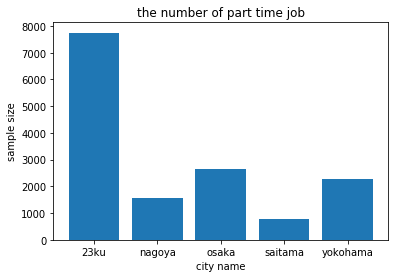

In [16]:
plt.bar(city_name, sample_size)
plt.xlabel("city name")
plt.ylabel("sample size")
plt.title("the number of part time job")

給与金額の比較

In [17]:
df['pay_form'].value_counts()

時給                22809
日給                 3330
月給                  263
1コマ　                119
1コマあたり：              68
1コマ（80分）：            61
1コマ                  61
1コマ（90分）             52
1コマ（95分）             44
コマ給（80分）1780～        44
1授業(80分)/            25
コマ給（80分）1680～         8
1コマ(95分)：             7
●1コマ(90分)/            3
1レッスン（90分）            3
1コマ(60分)：1300～        1
1コマ(90分)              1
1授業（90分・1対2）          1
1授業(90分)              1
1コマ（80分）              1
Name: pay_form, dtype: int64

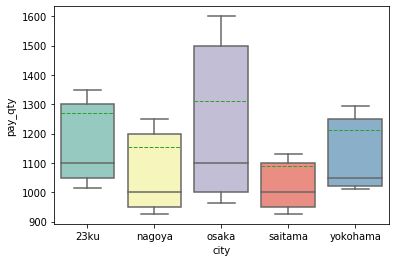

In [18]:
# 時給制のバイトに限定する
sns.boxplot(x="city", y="pay_qty", data=df_single[df_single["pay_form"]=="時給"], showfliers=False, showmeans=True, meanline=True, palette="Set3", whis=0.2)

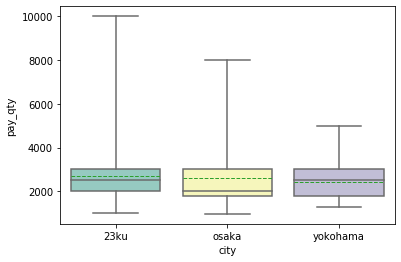

In [19]:
# 職種を絞ってみる
sns.boxplot(x="city", y="pay_qty", data=df[(df["pay_form"]=="時給") & (df["occupation"]=="nightwork")], showfliers=False, showmeans=True, meanline=True, palette="Set3", whis=100)

In [20]:
df[(df["pay_form"]=="時給") & (df["occupation"]=="nightwork") & (df['city']=='23ku')]

,city,corp,station,occupation,pay_form,pay_qty,start_time,end_time,daily_paid,weekly_paid,...,inexperienced,transport,age_10,age_20,age_30,age_40,age_50,sex_ratio,manner,atoms
14250,23ku,SNBカフェ オリーブ（Olive Shinbashi）,銀座駅,nightwork,時給,3500,13.0,1.0,1,1,...,1,1,1.0,1.0,0.0,0.0,0.0,0.75,0.50,0.50
14251,23ku,Chou Chou SNB （シュシュ新橋SL店）,新橋駅,nightwork,時給,4200,13.0,23.5,1,0,...,1,1,1.0,1.0,0.0,0.0,0.0,0.75,0.25,0.75
14252,23ku,資格系女子カフェ ジョイナス秋葉原店,秋葉原駅,nightwork,時給,3500,13.0,1.0,1,0,...,1,1,1.0,1.0,0.0,0.0,0.0,1.00,0.50,0.50
14253,23ku,AKB女子大生コンカフェ シュシュ秋葉原店（Chou Chou Akihabara）,秋葉原駅,nightwork,時給,4200,18.0,0.0,1,0,...,1,1,1.0,1.0,0.0,0.0,0.0,1.00,0.50,0.75
14254,23ku,資格系女子カフェ ジョイナス上野（Joynurse Ueno）,上野駅,nightwork,時給,3500,13.5,1.0,1,0,...,1,1,1.0,1.0,0.0,0.0,0.0,1.00,0.50,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14603,23ku,Girl's Bar Carino,中目黒駅,nightwork,時給,2000,20.0,5.0,1,1,...,1,0,1.0,1.0,1.0,0.0,0.0,1.00,0.75,0.75
14604,23ku,美妃―ミキ―,野方駅,nightwork,時給,1500,19.0,5.0,1,0,...,1,0,0.0,1.0,1.0,0.0,0.0,1.00,0.75,1.00
14605,23ku,Girls Bar Jack Rose~ジャックローズ ~,大井町駅,nightwork,時給,2000,20.0,5.0,1,1,...,1,0,1.0,1.0,1.0,0.0,0.0,0.75,0.50,0.50
14606,23ku,Girls Bar ルクール,赤羽駅,nightwork,時給,2800,20.0,5.0,1,1,...,1,0,1.0,1.0,1.0,0.0,0.0,0.75,0.50,0.50


In [21]:
for i in range(len(city_name)):
    print(city_name[i])
    print("sample size : {}".format(len(df_single[(df_single["pay_form"]=="時給") & (df["city"]==city_name[i])])))
    print(df_single[(df_single["pay_form"]=="時給") & (df_single["city"]==city_name[i])]["pay_qty"].describe())
    print("")

23ku
sample size : 12668
count     7750.000000
mean      1270.168000
std        462.657104
min       1013.000000
25%       1050.000000
50%       1100.000000
75%       1300.000000
max      10000.000000
Name: pay_qty, dtype: float64

nagoya
sample size : 2141
count    1561.000000
mean     1153.499680
std       355.325225
min       926.000000
25%       950.000000
50%      1000.000000
75%      1200.000000
max      4000.000000
Name: pay_qty, dtype: float64

osaka
sample size : 217
count    2667.000000
mean     1310.479940
std       601.458807
min       964.000000
25%      1000.000000
50%      1100.000000
75%      1500.000000
max      8000.000000
Name: pay_qty, dtype: float64

saitama
sample size : 0
count     760.000000
mean     1090.430263
std       247.719997
min       926.000000
25%       950.000000
50%      1000.000000
75%      1100.000000
max      2666.000000
Name: pay_qty, dtype: float64

yokohama
sample size : 0
count    2288.000000
mean     1210.851836
std       357.889902
min      

/Users/tamuramasayuki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


なぜ大阪市の四分位範囲が広いのか

都市ごとに最低賃金を下回っている割合を出す

最低賃金

東京都：1,013円、愛知県：926円、大阪府：964円、埼玉県：926円、神奈川県：1,011円

In [22]:
df_hour = df[df['pay_form']=='時給']
print(df_hour.shape)

(22809, 25)


2σを基準に外れ値を除く

In [1]:
pay_qty_mean = df_hour.groupby('city')['pay_qty'].mean()
pay_qty_std = df_hour.groupby('city')['pay_qty'].std()
outlier_max = pay_qty_mean + (pay_qty_std) * 2

NameError: name 'df_hour' is not defined

In [2]:
pay_qty_std

NameError: name 'pay_qty_std' is not defined

In [3]:
outlier_max

NameError: name 'outlier_max' is not defined

In [4]:
df_hour_minwage = pd.DataFrame(columns=df.columns)
for name in city_name:
    temp = df_hour[(df_hour['city']==name) & (df_hour['pay_qty']<=outlier_max[name])]
    df_hour_minwage = pd.concat([df_hour_del_outlier, temp])

NameError: name 'pd' is not defined

In [5]:
df_hour_minwage.shape

NameError: name 'df_hour_minwage' is not defined

In [6]:
for name in city_name:
    print(name)
    print("_________________")
    print(df_hour_minwage.groupby('city')['occupation'].value_counts()[name])
    print("")

NameError: name 'city_name' is not defined

In [7]:
# 件数が少ない職業を削除する
df_hour_minwage = df_hour_minwage[(df_hour_minwage['occupation']!='beauty') & (df_hour_minwage['occupation']!='nightwork') & 
                                                                    (df_hour_minwage['occupation']!='creative') & (df_hour_minwage['occupation']!='business') & 
                                                                    (df_hour_minwage['occupation']!='professional') & (df_hour_minwage['occupation']!='architecture') &
                                                                    (df_hour_minwage['occupation']!='investigation')]

NameError: name 'df_hour_minwage' is not defined

In [8]:
df_hour_minwage['occupation'].value_counts()

NameError: name 'df_hour_minwage' is not defined

In [9]:
minimum_wage = [1013, 926, 964, 926, 1011]
hour_minwage_array = []
for i, name in enumerate(city_name):
    hour_minwage_array.append(df_hour_minwage[df_hour_minwage['city']==name]['pay_qty'] / minimum_wage[i] - 1)

NameError: name 'city_name' is not defined

In [10]:
plt.boxplot(hour_minwage_array, labels=city_name)

NameError: name 'plt' is not defined

職種の割合

In [11]:
pd.unique(df.loc[:, 'occupation'])

NameError: name 'pd' is not defined

In [12]:
# 積み上げ割合グラフ
for i in range(len(city_name)):
    value_counts = df[df["city"]==city_name[i]]["occupation"].value_counts()
    bottom = 0
    for j in range(len(value_counts)):
        plt.bar(city_name[i], value_counts[j] / sum(value_counts), bottom=bottom)
        bottom += value_counts[j] / sum(value_counts)

NameError: name 'city_name' is not defined

非常に見にくい。色を調節しても見にくいと予想されるため、職業ごとに可視化してみる。

In [13]:
df_occupation_ratio = (
    df.groupby("city")["occupation"]
    .value_counts(normalize=True)
    .rename("percentage")
    .reset_index()
)

sns.catplot(
    x="city",
    y="percentage",
    col="occupation",
    data=df_occupation_ratio,
    kind="bar",
    palette="Set3",
)

NameError: name 'df' is not defined

In [14]:
sns.pairplot(df_single[df_single['pay_form']=='時給'].loc[:, ['pay_qty', 'daily_paid', 'weekly_paid', 'high_income']], palette='Blues')

NameError: name 'sns' is not defined

In [15]:
sns.stripplot(x='occupation', y='pay_qty', data=df[df['pay_form']=='時給'], jitter=True, palette='Blues')

NameError: name 'sns' is not defined

In [16]:
df.columns

NameError: name 'df' is not defined

In [17]:
df_single[df_single['pay_form']=='時給'].loc[:, ['pay_qty', 'daily_paid', 'weekly_paid', 'high_income']]

NameError: name 'df_single' is not defined